# Optimized Asset Allocation for Profit Maximization using Random Forest and Bayesian Optimization

## Import Important Modul

In [97]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [98]:
filepath = r'C:\Users\LENOVO\Downloads\dataoptimized.xlsx'
df = pd.read_excel(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Period         40 non-null     int64  
 1   giro           40 non-null     float64
 2   tab            40 non-null     float64
 3   dep            40 non-null     float64
 4   totaldpk       40 non-null     float64
 5   konsumer       40 non-null     float64
 6   ritel          40 non-null     float64
 7   umkm           40 non-null     float64
 8   korporasi      40 non-null     float64
 9   komersial      40 non-null     float64
 10  kprkkb         40 non-null     float64
 11  internasional  40 non-null     float64
 12  totalkredit    40 non-null     float64
 13  laba           40 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.5 KB


## Calculate Proportion 

In [99]:
df["giro_pct"] = df["giro"] / df["totaldpk"]
df["tabungan_pct"] = df["tab"] / df["totaldpk"]
df["deposito_pct"] = df["dep"] / df["totaldpk"]

df["konsumer_pct"] = df["konsumer"] / df["totalkredit"]
df["ritel_pct"] = df["ritel"] / df["totalkredit"]
df["umkm_pct"] = df["umkm"] / df["totalkredit"]
df["korporasi_pct"] = df["korporasi"] / df["totalkredit"]
df["komersial_pct"] = df["komersial"] / df["totalkredit"]
df["kpr_kkb_pct"] = df["kprkkb"] / df["totalkredit"]
df["internasional_pct"] = df["internasional"] / df["totalkredit"]

In [100]:
df.tail()

,Period,giro,tab,dep,totaldpk,konsumer,ritel,umkm,korporasi,komersial,...,giro_pct,tabungan_pct,deposito_pct,konsumer_pct,ritel_pct,umkm_pct,korporasi_pct,komersial_pct,kpr_kkb_pct,internasional_pct
35,36,18436.543342,34114.888471,73192.227945,125743.659757,52944.399299,20755.720065,4941.650458,14900.214507,10536.427994,...,0.146620,0.271305,0.582075,0.443109,0.173711,0.041358,0.124705,0.088183,0.090062,0.038871
36,37,19770.483918,35784.789745,68284.947167,123840.220830,53022.385327,20707.983517,4864.591204,14768.336509,9646.768420,...,0.159645,0.288959,0.551396,0.447812,0.174894,0.041085,0.124729,0.081474,0.090903,0.039104
37,38,22572.339210,34109.589671,67621.278839,124303.207719,53024.827070,20646.943070,4876.350733,15063.705926,9581.411795,...,0.181591,0.274406,0.544003,0.446749,0.173956,0.041085,0.126916,0.080726,0.090733,0.039835
38,39,21399.111165,35049.091605,70317.223013,126765.425783,52866.171598,20598.998446,4845.741556,14875.981947,9941.532038,...,0.168809,0.276488,0.554703,0.447084,0.174204,0.040980,0.125805,0.084074,0.091016,0.036838
39,40,21068.817753,33530.417085,68610.406697,123209.641534,53004.512213,20552.504130,4726.406194,12965.513630,9881.838723,...,0.171000,0.272141,0.556859,0.456808,0.177127,0.040734,0.111741,0.085165,0.092573,0.035852


## Create Feature & Target

In [101]:
X = df.filter(regex="_pct$")
y = df["laba"]

## Linear Regression

In [102]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   laba   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     8.192
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           6.85e-06
Time:                        14:12:55   Log-Likelihood:                -200.50
No. Observations:                  40   AIC:                             419.0
Df Residuals:                      31   BIC:                             434.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               347.6047    517.10

## Random Forest Regressor

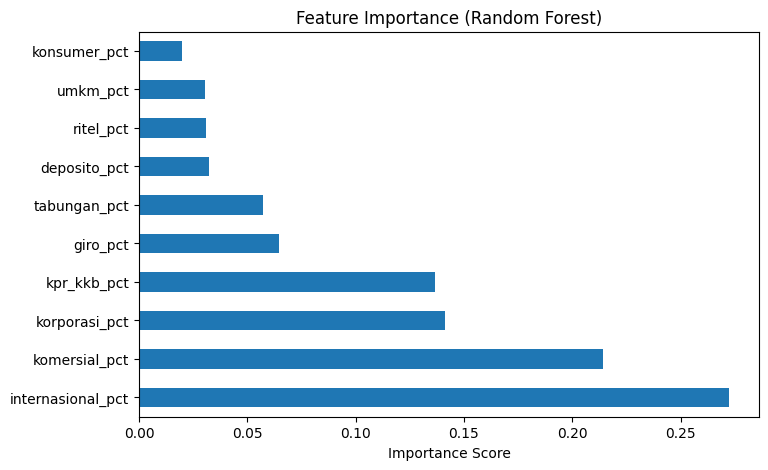

In [103]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='barh', title='Feature Importance (Random Forest)', figsize=(8, 5))
plt.xlabel('Importance Score')
plt.show()

## Bayesian Optimization

In [104]:
space = [
    Real(0.1, 0.5, name='giro_pct'),
    Real(0.1, 0.5, name='tabungan_pct'),
    
    Real(0.05, 0.5, name='konsumer_pct'),
    Real(0.05, 0.5, name='ritel_pct'),
    Real(0.05, 0.5, name='komersial_pct'),
    Real(0.05, 0.5, name='korporasi_pct'),
    Real(0.01, 0.5, name='umkm_pct'),
    Real(0.05, 0.5, name='kpr_kkb_pct'),
]

@use_named_args(space)
def objective(**params):
    # DPK constraint
    giro = params['giro_pct']
    tabungan = params['tabungan_pct']
    deposito = 1.0 - giro - tabungan
    if deposito < 0 or deposito > 1:
        return 1e5

    # Loan constraint
    kredit_sum = sum([
        params['konsumer_pct'], params['ritel_pct'], params['komersial_pct'],
        params['korporasi_pct'], params['umkm_pct'], params['kpr_kkb_pct']
    ])
    internasional = 1.0 - kredit_sum
    if internasional < 0 or internasional > 1:
        return 1e5

    # Profit Predict Profit
    input_vals = np.array([[
        giro,
        tabungan,
        deposito,
        params['konsumer_pct'],
        params['ritel_pct'],
        params['komersial_pct'],
        params['korporasi_pct'],
        params['umkm_pct'],
        params['kpr_kkb_pct'],
        internasional
    ]])

    pred = rf.predict(input_vals)
    return -pred[0] 

In [105]:
res_gp = gp_minimize(objective, space, n_calls=200, random_state=42)

optimal_params = dict(zip([dim.name for dim in space], res_gp.x))
optimal_params['deposito_pct'] = 1.0 - optimal_params['giro_pct'] - optimal_params['tabungan_pct']
kredit_total = sum(optimal_params[k] for k in [
    'konsumer_pct', 'ritel_pct', 'komersial_pct',
    'korporasi_pct', 'umkm_pct', 'kpr_kkb_pct'
])
optimal_params['internasional_pct'] = 1.0 - kredit_total
optimal_params['prediksi_laba'] = -res_gp.fun

In [106]:
df_opt = pd.DataFrame([optimal_params]).T
df_opt.columns = ["Optimaztion Result"]
print(df_opt.round(4))

                   Optimaztion Result
giro_pct                       0.2969
tabungan_pct                   0.2049
konsumer_pct                   0.0975
ritel_pct                      0.1686
komersial_pct                  0.0703
korporasi_pct                  0.1941
umkm_pct                       0.2431
kpr_kkb_pct                    0.2115
deposito_pct                   0.4982
internasional_pct              0.0149
prediksi_laba                225.5756
